In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
estate_data = pd.read_csv('estate_preprocessed.csv')

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [9]:
# 피처와 타겟 정의
X = estate_data.drop(columns=['물건금액(만원)', '물건금액_log'])  # 피처
y = estate_data['물건금액_log']  # 타겟 (로그 변환된 값)

# train, validation, test 세트로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 스태킹 모델에 최적의 XGBRegressor 사용
estimators = [
    ('rf', RandomForestRegressor(max_depth=None, n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=300, subsample=0.8, random_state=42)),
    ('cat', CatBoostRegressor(learning_rate=0.1, verbose=0, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5, weights='distance'))
]

# 스태킹 모델 구성
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# 학습 및 검증
stacking_model.fit(X_train, y_train)
y_pred_val = stacking_model.predict(X_val)

# 검증 세트에 대한 RMSE 계산
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
print(f"Stacking 앙상블 모델의 검증 세트 RMSE: {rmse_val}")

# 최종 테스트 평가
y_pred_test = stacking_model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Stacking 앙상블 모델의 테스트 세트 RMSE: {rmse_test}")

ValueError: could not convert string to float: '강북구'

In [19]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60937 entries, 0 to 60936
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   자치구코드       60937 non-null  int64  
 1   법정동코드       60937 non-null  int64  
 2   물건금액(만원)    60937 non-null  int64  
 3   건축년도        60937 non-null  float64
 4   계약년월        60937 non-null  int64  
 5   권리구분_분양권    60937 non-null  bool   
 6   권리구분_입주권    60937 non-null  bool   
 7   신고구분_중개거래   60937 non-null  bool   
 8   신고구분_직거래    60937 non-null  bool   
 9   건물용도_단독다가구  60937 non-null  bool   
 10  건물용도_아파트    60937 non-null  bool   
 11  건물용도_연립다세대  60937 non-null  bool   
 12  건물용도_오피스텔   60937 non-null  bool   
 13  층_범주        60937 non-null  float64
 14  자치구코드_범주화   60937 non-null  int64  
 15  법정동코드_범주화   60937 non-null  int64  
 16  물건금액_log    60937 non-null  float64
 17  건물면적_log    60937 non-null  float64
 18  토지면적_log    60937 non-null  float64
dtypes: bool(8), float64(5), i

In [20]:
submission_data = pd.read_csv('submission_preprocessed.csv')

submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   자치구코드       6389 non-null   int64  
 1   법정동코드       6389 non-null   int64  
 2   건축년도        6389 non-null   float64
 3   물건금액(만원)    6389 non-null   int64  
 4   층_범주        6389 non-null   float64
 5   자치구코드_범주화   6389 non-null   int64  
 6   법정동코드_범주화   6389 non-null   int64  
 7   계약년월        6389 non-null   int64  
 8   물건금액_log    6389 non-null   float64
 9   건물면적_log    6389 non-null   float64
 10  토지면적_log    6389 non-null   float64
 11  권리구분_분양권    6389 non-null   bool   
 12  권리구분_입주권    6389 non-null   bool   
 13  신고구분_중개거래   6389 non-null   bool   
 14  신고구분_직거래    6389 non-null   bool   
 15  건물용도_단독다가구  6389 non-null   bool   
 16  건물용도_아파트    6389 non-null   bool   
 17  건물용도_연립다세대  6389 non-null   bool   
 18  건물용도_오피스텔   6389 non-null   bool   
dtypes: bool(8), float64(5), int

In [21]:
# submission 데이터의 피처 이름과 순서를 맞춰줌 
estate_preprocessed_columns = estate_data.columns.tolist()
submission_data = submission_data[estate_preprocessed_columns]

# 예측에 사용할 feature 데이터 준비 
X_submission = submission_data.drop(columns=['물건금액(만원)', '물건금액_log'], errors='ignore')  # 피처만 남기기

# 스태킹 앙상블 모델로 예측 (로그 스케일로 나올 것이므로 exp 변환 필요)
predicted_log_prices = stacking_model.predict(X_submission)
predicted_prices = np.exp(predicted_log_prices)  # 로그 스케일에서 원래 가격으로 변환

# 예측 결과를 '물건금액(만원)' 열에 채워넣음
submission_data['물건금액(만원)'] = predicted_prices

# 결과를 CSV 파일로 저장
submission_data.to_csv('예측결과.csv', index=False)

submission_data

,자치구코드,법정동코드,물건금액(만원),건축년도,계약년월,권리구분_분양권,권리구분_입주권,신고구분_중개거래,신고구분_직거래,건물용도_단독다가구,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,층_범주,자치구코드_범주화,법정동코드_범주화,물건금액_log,건물면적_log,토지면적_log
0,11620,10100,52176.748378,2000.0,202401,False,False,True,False,False,True,False,False,3.0,1,1,0.0,4.106932,0.000000
1,11620,10100,24536.245600,1996.0,202405,False,False,True,False,False,False,True,False,2.0,1,1,0.0,4.026601,3.218876
2,11620,10100,36175.730381,1992.0,202405,False,False,True,False,False,False,True,False,2.0,1,1,0.0,4.287716,3.850148
3,11620,10200,19680.655719,1991.0,202401,False,False,True,False,False,False,True,False,2.0,1,7,0.0,3.889368,3.493777
4,11620,10100,22849.491148,2002.0,202404,False,False,True,False,False,False,True,False,2.0,1,1,0.0,3.762827,3.004196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,11590,10700,37536.882112,1993.0,202406,False,False,True,False,False,True,False,False,3.0,1,8,0.0,3.865979,0.000000
6385,11590,10800,13989.566175,2002.0,202408,False,False,True,False,False,False,True,False,2.0,1,9,0.0,3.560478,2.890372
6386,11590,10500,53265.887266,1988.0,202405,False,False,True,False,False,True,False,False,2.0,1,8,0.0,4.370334,0.000000
6387,11590,10300,15800.534811,2001.0,202404,False,False,False,True,False,False,True,False,2.0,1,8,0.0,3.620601,3.122805


In [22]:
# RandomForest 피처 중요도
rf_feature_importances = stacking_model.named_estimators_['rf'].feature_importances_
xgb_feature_importances = stacking_model.named_estimators_['xgb'].feature_importances_
cat_feature_importances = stacking_model.named_estimators_['cat'].get_feature_importance()

# 피처 중요도를 데이터프레임으로 정리
feature_names = X_train.columns
rf_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances}).sort_values(by='Importance', ascending=False)
xgb_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importances}).sort_values(by='Importance', ascending=False)
cat_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': cat_feature_importances}).sort_values(by='Importance', ascending=False)

# 출력
print("RandomForest Feature Importances:\n", rf_importances_df)
print("XGBoost Feature Importances:\n", xgb_importances_df)
print("CatBoost Feature Importances:\n", cat_importances_df)


RandomForest Feature Importances:
        Feature  Importance
15    건물면적_log    0.592210
13   자치구코드_범주화    0.132313
10  건물용도_연립다세대    0.070326
2         건축년도    0.065092
9     건물용도_아파트    0.026839
1        법정동코드    0.025019
16    토지면적_log    0.024962
0        자치구코드    0.024256
14   법정동코드_범주화    0.014368
3         계약년월    0.006943
11   건물용도_오피스텔    0.006658
12        층_범주    0.004556
8   건물용도_단독다가구    0.003038
7     신고구분_직거래    0.001578
6    신고구분_중개거래    0.001559
4     권리구분_분양권    0.000161
5     권리구분_입주권    0.000124
XGBoost Feature Importances:
        Feature  Importance
10  건물용도_연립다세대    0.267798
9     건물용도_아파트    0.231301
15    건물면적_log    0.149904
13   자치구코드_범주화    0.131730
11   건물용도_오피스텔    0.078844
8   건물용도_단독다가구    0.041724
2         건축년도    0.018095
0        자치구코드    0.015610
14   법정동코드_범주화    0.012602
1        법정동코드    0.009930
12        층_범주    0.009724
4     권리구분_분양권    0.007048
6    신고구분_중개거래    0.006889
16    토지면적_log    0.006263
5     권리구분_입주권    0.005218
7     신고구분_직거래   

In [23]:
meta_model_coef = stacking_model.final_estimator_.coef_
print("Final Meta Model (LinearRegression) Coefficients:", meta_model_coef)

Final Meta Model (LinearRegression) Coefficients: [0.28036743 0.55066554 0.12132776 0.06248513]


In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

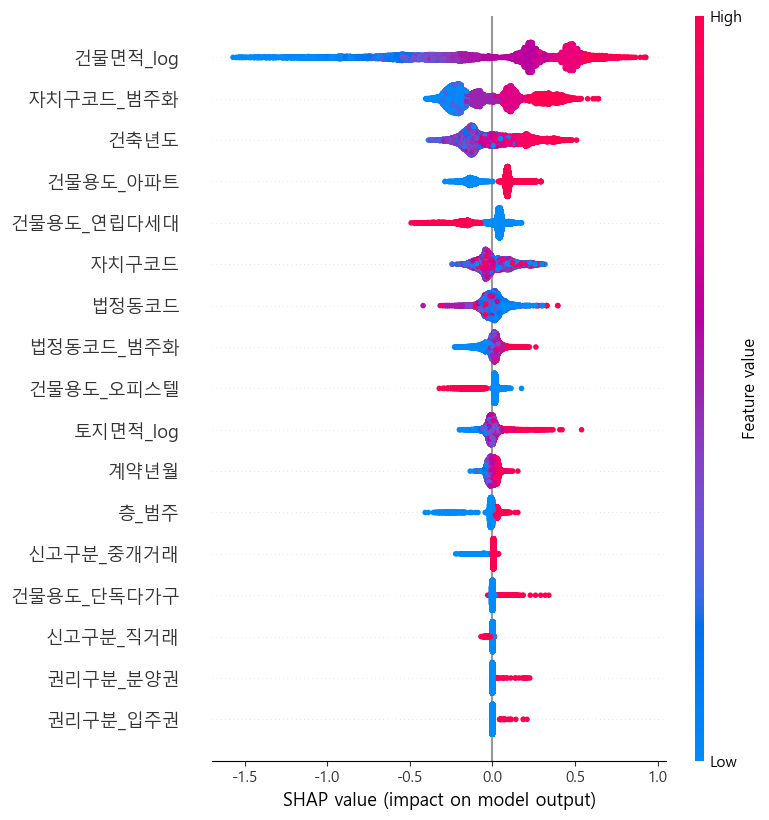

In [25]:
import shap

# SHAP 값을 계산하기 위해 TreeExplainer를 사용 (트리 기반 모델에 적합)
explainer = shap.TreeExplainer(stacking_model.named_estimators_['xgb'])
shap_values = explainer.shap_values(X_val)

# SHAP 값을 시각화
shap.summary_plot(shap_values, X_val)
